# TAREA

Andrea del Pilar Zamora Cortes 

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [6]:
import pandas as pd
import numpy as np

def f1(x):
    return np.exp(x)*np.log10(x)
def f2(x):
    return np.sin(x)*np.log(x)
a=1
b=3
N = np.logspace(1,5,5)
table=pd.DataFrame(columns=["Aproximación 1", "Error 1","Aproximación 2","Error 2"],index=N)

def montecarlo(f,N,a,b):
    u= np.random.uniform(a,b,N)
    media= np.mean(f(u))
    return media*(b-a)

for i in N:
    aprox1 = montecarlo(f1, int(i), a, b)
    aprox2 = montecarlo(f2, int(i), a, b)
    table.loc[i,"Aproximación 1"] = aprox1
    table.loc[i,"Aproximación 2"] = aprox2
    table.loc[i, "Error 1"] = np.abs(6.09207- aprox1)
    table.loc[i, "Error 2"] = np.abs(0.869844- aprox2)
table

,Aproximación 1,Error 1,Aproximación 2,Error 2
10.0,5.845769,0.246301,0.806791,0.063053
100.0,6.366771,0.274701,0.843637,0.026207
1000.0,6.032647,0.059423,0.855034,0.01481
10000.0,6.177832,0.085762,0.875424,0.00558
100000.0,6.118168,0.026098,0.870172,0.000328


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def formula(x,y):
    return (x**2 + 2*y**2 <= -2*x + 8*y - 7)

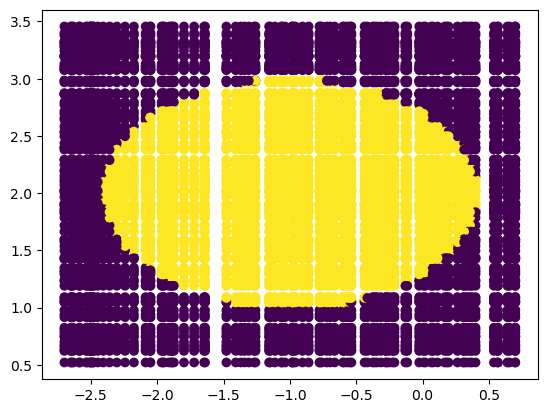

In [26]:
x= np.random.uniform(-2.7,0.7,100)
y= np.random.uniform(0.5,3.5,100)

X,Y = np.meshgrid(x,y)
plt.figure()
plt.scatter(X,Y, c=formula(X,Y))

In [33]:
xa = -2.7
xb = 0.7
ya = 0.5
yb = 3.5
N = np.logspace(1,5,5)
table1 = pd.DataFrame(columns=["Aproximación","Error relativo"], index=N)

def montercalo2(region, xa, xb, ya, yb, N):
    x_dardos = np.random.uniform(xa,xb,N)
    y_dardos = np.random.uniform(ya,yb,N)
    B = region(x_dardos,y_dardos)
    AR = (xb-xa)*(yb-ya)
    return np.mean(B)*AR

def C (AD, AR) :
    return(np.sqrt((1-AD/AR)/(AD/AR)))

for i in N:
    AD = montercalo2(formula, xa,xb,ya,yb, int(i))
    table1.loc[i,"Aproximación"] = AD
    error_relativo = np.log10(C(AD, AR)) - np.log(i)/2
    table1.loc[i,"Error relativo"] = error_relativo
    
table1

,Aproximación,Error relativo
10.0,4.08,-1.063247
100.0,4.692,-2.267767
1000.0,4.284,-3.383788
10000.0,4.48188,-4.552274
100000.0,4.440162,-5.699957


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### Evaluación de riesgos de forma tridimensional
La integración Monte Carlo se usa aquí para evaluar el riesgo en tres dimensiones (probabilidad, severidad y detectabilidad). Se generan valores aleatorios para estas dimensiones y se calcula el riesgo en función de estos valores, lo que brinda una evaluación más precisa y cuantitativa que los métodos cualitativos tradicionales.

### En la geotecnia 
La integración Monte Carlo se usa aquí para evaluar la confiabilidad y el riesgo de falla en taludes y otras estructuras geotécnicas al tener en cuenta la incertidumbre en los datos de entrada mediante simulaciones probabilísticas. Esto ayuda a los ingenieros a tomar decisiones más fundamentadas en el diseño y la gestión de proyectos geotécnicos.

### Simulación Monte Carlo de las cargas vivas en puentes
La integración Monte Carlo se utiliza para simular diferentes situaciones de tráfico vehicular y calcular los esfuerzos en un puente en función de esas situaciones. Esto ayuda a evaluar el desempeño estructural del puente en el presente y en el futuro, teniendo en cuenta posibles cambios en el tráfico y las cargas vivas. En el estudio específico, se aplicó esta metodología al Puente Barranca Honda para evaluar su capacidad de soportar las condiciones de tráfico cambiantes en un período de 30 años.

## Bibliografía
- Chávez Ayvar, F., Quintana Rodríguez, J. A., Carrión Viramontes, F., Crespo Sánchez, S. E., Hernández Guzmán, A., & Montes Zea, M. (2013). Simulación Monte Carlo de las cargas vivas en el puente Barranca Honda para la obtención de las proyecciones estadísticas de esfuerzos y ciclos de carga. Publicación Técnica No. 387. Secretaría de Comunicaciones y Transportes, Instituto Mexicano del Transporte. Sanfandila, Qro. Recuperado de https://imt.mx/archivos/Publicaciones/PublicacionTecnica/pt387.pdf

- Flores Cabello, F.R. (2018). Método Probabilístico de Estimación para la Seguridad de Taludes Frente al Fallo por Deslizamiento. Universidad Mayor de San Andrés, Facultad de Ingeniería. La Paz, Bolivia. Recuperado de https://repositorio.umsa.bo/bitstream/handle/123456789/31980/PG-7204.pdf?sequence=1&isAllowed=y

- Simulación Monte Carlo para la evaluación de riesgos de forma tridimensional. (s/f). Recuperado el 9 de octubre de 2023, de https://es.linkedin.com/pulse/simulaci%C3%B3n-monte-carlo-para-la-evaluaci%C3%B3n-de-riesgos-forma-hernandez

